# Single Neuron - Perceptron

Invented in 1958 by Frank Rosenblatt to mimic the behavior of a brain cell (neuron)

![Neuron](Single-Neuron-Activation.svg)




In [1]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

%matplotlib inline

In [220]:
data = datasets.make_classification(n_samples=500, n_features=2, n_redundant=0,shuffle=False, random_state=17)

In [221]:
X = data[0]
y = data[1]
print(X.shape, y.shape)

(500, 2) (500,)


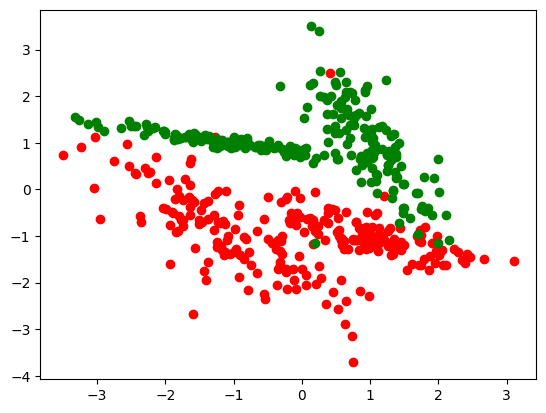

In [357]:
plt.scatter(X[y==0,0],X[y==0,1],c='r')
plt.scatter(X[y==1,0],X[y==1,1],c='g')

In [390]:
class Perceptron:
    def __init__(self, dim=2, lr=0.015):
        self.lr=lr
        self.W = np.random.random(dim)
        self.b = np.random.random()
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def eval(self, x):
        return self.sigmoid(x.dot(self.W.T)+self.b)
    def fwd(self,x):
        return np.round(self.eval(x))
    def learn(self, x, y):
        ytag = self.eval(x)
        for i,d in enumerate(ytag - y):
            self.W -= self.lr*x[i]*d
            self.b -= self.lr*d
    
        return np.sqrt(np.sum(((self.eval(x)-y))**2))

In [531]:
p = Perceptron(lr=0.005)

3.401820068183025


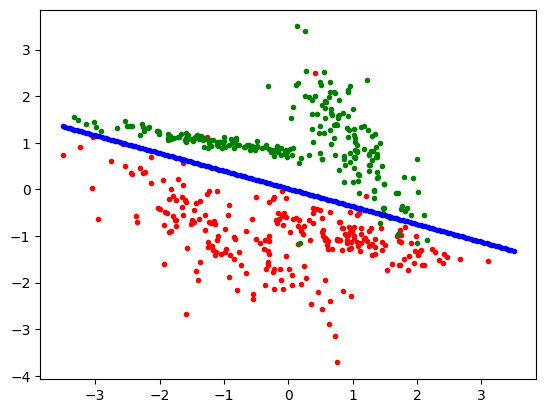

In [556]:
ytag = p.fwd(X)
viz = lambda x: -x*p.W[0]/p.W[1] - p.b/p.W[1]
vizX = np.linspace(-3.5,3.5,200)
vizY = viz(vizX)
print(p.learn(X,y))
plt.figure()
plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='.')
plt.scatter(X[y==1,0],X[y==1,1],c='g',marker='.')
plt.scatter(vizX, vizY, c='b', marker='.')

In [577]:
from sklearn import svm as SVM
svm = SVM.SVC(kernel='poly')
svm.fit(X, y)
ytag2 = svm.predict(X)

Text(0.5, 1.0, 'Perceptron')

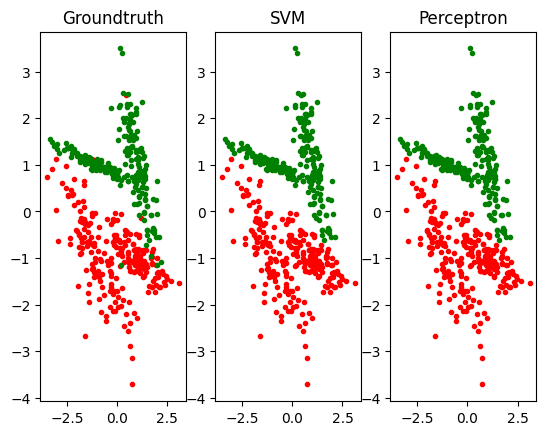

In [578]:
plt.subplot(1,3,1)
plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='.')
plt.scatter(X[y==1,0],X[y==1,1],c='g',marker='.')
plt.title('Groundtruth')
plt.subplot(1,3,2)
plt.scatter(X[ytag2==0,0],X[ytag2==0,1],c='r',marker='.')
plt.scatter(X[ytag2==1,0],X[ytag2==1,1],c='g',marker='.')
plt.title('SVM')
plt.subplot(1,3,3)
plt.scatter(X[ytag==0,0],X[ytag==0,1],c='r',marker='.')
plt.scatter(X[ytag==1,0],X[ytag==1,1],c='g',marker='.')
plt.title('Perceptron')